In [1]:
import matplotlib.pyplot as plt
from ge_2014.simulation.rod_2D_simulation import rod_2D_sources_fc
from ge_2014.simulation.rod_2D_simulation import rod_2D_simulation
import ge_2014.units.units as units
import meep as mp

In [6]:

resolution = 20
padding = 4.0
nb =1.5
pml_thickness = 1.0/rod_2D_sources_fc
source_width = 6*units.fs #smoothing
nonpml_vol = mp.Volume(mp.Vector3(),size=mp.Vector3(2*padding,2*padding))


In [16]:
sim = rod_2D_simulation(resolution=resolution,
                        padding=padding,
                        pml_thickness=pml_thickness,
                        background_index=nb,
                        source_width=source_width)
sim.init_sim()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000286102 s
Working in 2D dimensions.
Computational cell is 9.45 x 9.45 x 0 with resolution 20
     block, center = (0,0,0)
          size (0.01,0.08,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.0961041 s
drude susceptibility: frequency=6.68914, gamma=0.0371619
-----------


In [17]:
dft_obj = sim.add_dft_fields([mp.Ey], 
                            rod_2D_sources_fc,
                            0,
                            1,
                            where=nonpml_vol)

In [18]:

sim.run(until_after_sources=300)

/home/maeve/micromamba/envs/nano-cavity/lib/python3.10/site-packages/meep/simulation.py:1344: RuntimeWarning: Note: your sources include frequencies outside the range of validity of the material models. This is fine as long as you eventually only look at outputs (fluxes, resonant modes, etc.) at valid frequencies.
  warnings.warn(warn_src, RuntimeWarning)


FloatProgress(value=0.0, description='0% done ', max=317.98754692077637)

Meep progress: 54.575/317.98754692077637 = 17.2% done in 4.0s, 19.3s to go
on time step 2193 (time=54.825), 0.00182419 s/step
Meep progress: 108.22500000000001/317.98754692077637 = 34.0% done in 8.0s, 15.5s to go
on time step 4342 (time=108.55), 0.00186243 s/step
Meep progress: 167.70000000000002/317.98754692077637 = 52.7% done in 12.0s, 10.8s to go
on time step 6724 (time=168.1), 0.00168022 s/step
Meep progress: 224.22500000000002/317.98754692077637 = 70.5% done in 16.0s, 6.7s to go
on time step 8990 (time=224.75), 0.00176587 s/step
Meep progress: 281.425/317.98754692077637 = 88.5% done in 20.0s, 2.6s to go
on time step 11273 (time=281.825), 0.00175321 s/step
run 0 finished at t = 318.0 (12720 timesteps)


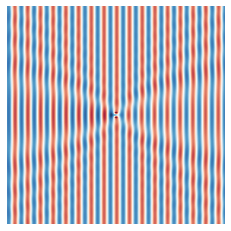

In [19]:
import numpy as np
ey_data = np.real(sim.get_dft_array(dft_obj, mp.Ey, 0))

plt.figure()
plt.imshow(ey_data.transpose(), interpolation="spline36", cmap="RdBu", alpha=0.9)
plt.axis("off")
plt.show()
sim.reset_meep()

## Look at initial response

FloatProgress(value=0.0, description='0% done ', max=50.0)

     block, center = (0,0,0)
          size (0.01,0.08,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (0.01,0.08,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (0.01,0.08,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
Meep progress: 17.96/50.0 = 35.9% done in 4.0s, 7.1s to go
on time step 1800 (time=18), 0.00223081 s/step
Meep progress: 34.5/50.0 = 69.0% done in 8.0s, 3.6s to go
on time step 3451 (time=34.51), 0.0024272 s/step
Normalizing field data...
Normalizing field data...
Normalizing field data...


/home/maeve/micromamba/envs/nano-cavity/lib/python3.10/site-packages/meep/visualization.py:966: RuntimeWarning: invalid value encountered in divide
  fields = np.array(self.cumulative_fields) / np.max(np.abs(self.cumulative_fields), axis=(0,1,2))


run 8 finished at t = 50.0 (5000 timesteps)
Generating GIF...
Generating GIF...
Generating GIF...


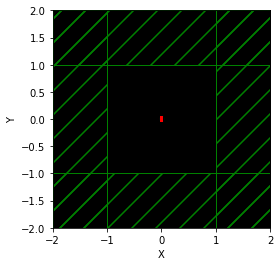

In [23]:
sim.init_sim()
sim.restart_fields()
fig = plt.figure()

animation_x = mp.Animate2D(sim,fields=mp.Ex,f=fig,normalize=True)
animation_y = mp.Animate2D(sim,fields=mp.Ey,f=fig,normalize=True)
animation_z = mp.Animate2D(sim,fields=mp.Ez,f=fig,normalize=True)
sim.run(mp.at_every(.5, animation_x,animation_y,animation_z),until=50)

animation_x.to_gif(20,'rod_sim_x.gif')
animation_y.to_gif(20,'rod_sim_y.gif')
animation_z.to_gif(20,'rod_sim_z.gif')